In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Обнаружение выбросов

Выбросы - вещь неприятная, но, как правило, неизбежная. Сгенерируем данные с выбросами:

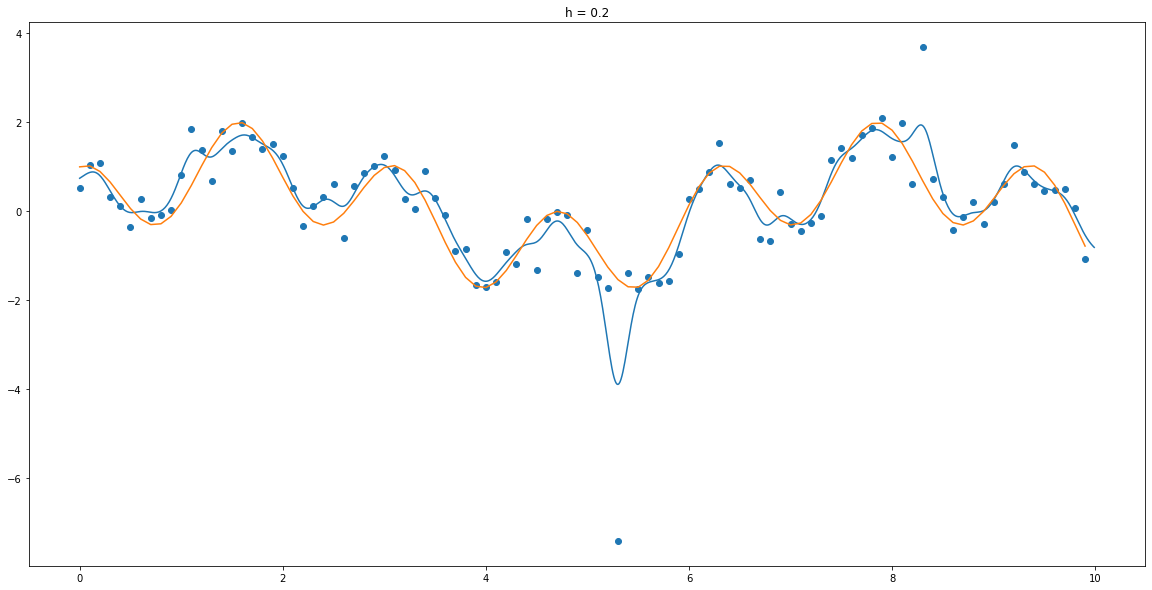

In [2]:
def K(x):
    return np.exp(-2 * x**2)


def fit(x_fit, x_learn, y_learn, h=0.3):
    distance = x_fit.reshape(-1, 1) - x_learn.reshape(1, -1)
    weigths = K(distance / h)
    yfit = np.sum(y_learn*weigths, axis=1) / np.sum(weigths, axis=1)
    
    return yfit

h = 0.2
np.random.seed(42)

x = np.arange(0, 10, 0.1)
y = np.sin(x) + np.cos(4*x)

outlier_idx = np.random.choice(range(len(x)), 2, replace=False)
x_noised = x + np.random.normal(0, 0.1, size=x.shape)
y_noised = np.sin(x_noised) + np.cos(4*x_noised) + np.random.normal(0, 0.3, size=x.shape)
y_noised[outlier_idx] *= 5

xfit = np.arange(0, 10, 0.01)
yfit = fit(xfit, x, y_noised, h)

fig = plt.figure(figsize=(20, 10))
plt.scatter(x, y_noised)
plt.plot(xfit, yfit)
plt.plot(x, y)
_ = plt.title(f'h = {h}')

## Скользящий контроль

Автоматически выбросы можно определить при помощи метода скользящего контроля. Мы последовательно будем исключать из обучающей выборки по одной точке и смотреть, насколько будет изменяться ошибка аппроксимации на оставшейся части:

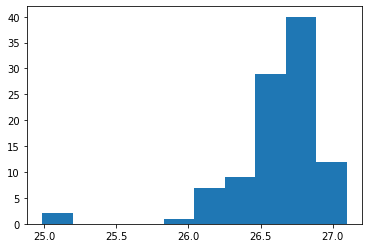

In [3]:
def K(x):
    return np.exp(-2 * x**2)


def fit(x_fit, x_learn, y_learn, h=0.3):
    distance = x_fit.reshape(-1, 1) - x_learn.reshape(1, -1)
    weigths = K(distance / h)
    yfit = np.sum(y_learn*weigths, axis=1) / np.sum(weigths, axis=1)
    
    return yfit


np.random.seed(42)
h = 0.3

x = np.arange(0, 10, 0.1)
y = np.sin(x) + np.cos(4*x)

x_noised = x + np.random.normal(0, 0.1, size=x.shape)
y_noised = np.sin(x_noised) + np.cos(4*x_noised) + np.random.normal(0, 0.3, size=x.shape)

outlier_idx = np.random.choice(range(len(x)), 2, replace=False)
y_noised[outlier_idx] *= 5

err = np.zeros_like(x)
for i in range(x.size):
    mask = np.ones_like(x, dtype=bool)
    mask[i] = 0
    
    x_learn = x_noised[mask]
    y_learn = y_noised[mask]
    yfit = fit(x_learn, x_learn, y_learn, h)
    
    
    err[i] = (np.sum(np.abs(yfit - y_learn)))

_ = plt.hist(err)

Мы видим, что исключение пары точек значительно понижает ошибку аппроксимации. Вот и дотянемся до них:

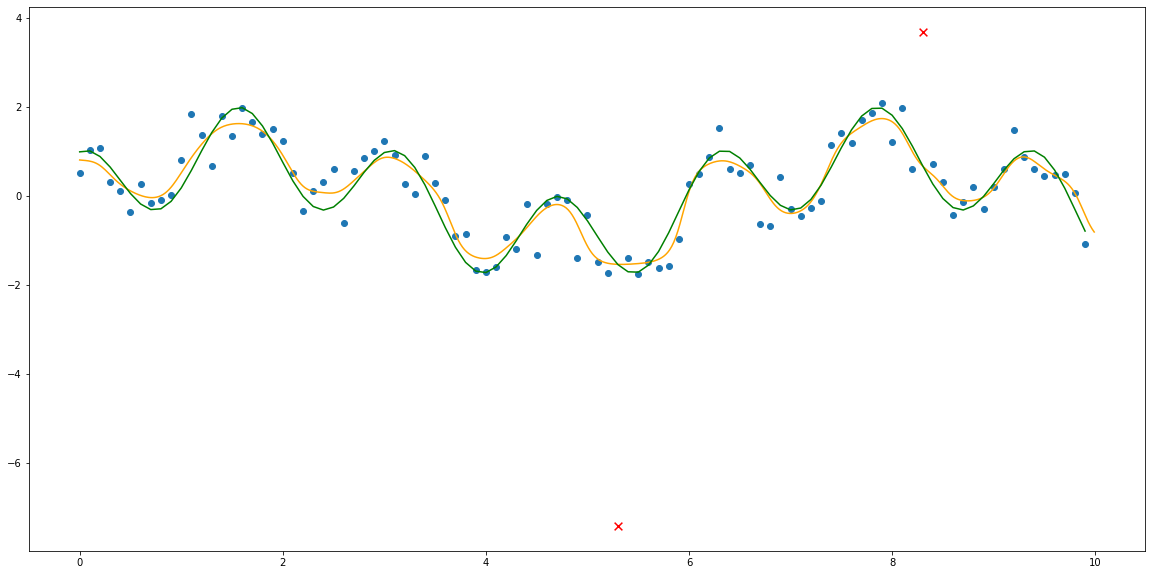

In [4]:
def K(x):
    return np.exp(-2 * x**2)


def fit(x_fit, x_learn, y_learn, h=0.3):
    distance = x_fit.reshape(-1, 1) - x_learn.reshape(1, -1)
    weigths = K(distance / h)
    yfit = np.sum(y_learn*weigths, axis=1) / np.sum(weigths, axis=1)
    
    return yfit


np.random.seed(42)

x = np.arange(0, 10, 0.1)
y = np.sin(x) + np.cos(4*x)

outlier_idx = np.random.choice(range(len(x)), 2, replace=False)
x_noised = x + np.random.normal(0, 0.1, size=x.shape)
y_noised = np.sin(x_noised) + np.cos(4*x_noised) + np.random.normal(0, 0.3, size=x.shape)
y_noised[outlier_idx] *= 5

h = 0.3

err = np.zeros_like(x)
for i in range(x.size):
    mask = np.ones_like(x, dtype=bool)
    mask[i] = 0
    
    x_learn = x_noised[mask]
    y_learn = y_noised[mask]
    yfit = fit(x_learn, x_learn, y_learn, h)
    
    err[i] = (np.sum(np.abs(yfit - y_learn)))

mask = np.ones_like(x, dtype=bool)
outliers = np.argsort(err)[:2]
mask[outliers] = 0

xfit = np.arange(0, 10, 0.01)
x_learn = x_noised[mask]
y_learn = y_noised[mask]
yfit = fit(xfit, x_learn, y_learn, h)

fig = plt.figure(figsize=(20, 10))
plt.scatter(x[mask], y_noised[mask])
plt.scatter(x[~mask], y_noised[~mask], marker='x', c='r', s=60)
plt.plot(xfit, yfit, c='orange')
_ = plt.plot(x, y, c='g')